# Exploratory Analysis 

In [1]:
import pandas as pd
from pandas import Series, DataFrame
import os
import sys
import numpy as np


pd.set_option('display.max_columns', 500)

## Load Data

In [2]:
applicationDF = pd.read_csv(os.path.join('.','data','application_train.csv'))

## Basic Exploration

In [3]:
applicationDF.shape

(307511, 122)

In [4]:
applicationDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
applicationDF.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [6]:
applicationDF['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [7]:
applicationDF['TARGET'].value_counts() / applicationDF.shape[0]

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

## Clean Data

In [8]:
from tools.modelTools import categoricalColumns, numericalColumns

In [9]:
categoricalColumns = categoricalColumns()
numericalColumns = numericalColumns()

In [ ]:
# create matrix of missing values
# only keep the column if it has missing values

numericalColumnsNan = (applicationDF[numericalColumns].isnull() * 1)
numericalColumnsNanList = (numericalColumnsNan.sum(axis=0) > 0)
numericalColumnsNanListFilter = numericalColumnsNanList[numericalColumnsNanList==True].index
numericalColumnsNanListFINAL = numericalColumnsNan[numericalColumnsNanListFilter]

In [ ]:
# create matrix of missing values
# only keep the column if it has missing values

categoricalColumnsNan = (applicationDF[categoricalColumns].isnull() * 1)
categoricalColumnsNanList = (categoricalColumnsNan.sum(axis=0) > 0)
categoricalColumnsNanListFilter = categoricalColumnsNanList[categoricalColumnsNanList==True].index
categoricalColumnsNanListFINAL = categoricalColumnsNan[categoricalColumnsNanListFilter]

In [ ]:
print(applicationDF[categoricalColumns].shape)
print(numericalColumnsNanListFINAL.shape)
print(categoricalColumnsNanListFINAL.shape)


In [ ]:
categoricalDF = pd.concat([applicationDF[categoricalColumns], numericalColumnsNanListFINAL, categoricalColumnsNanListFINAL], axis=1)

In [ ]:
# if you do not want to return a sparse matrix
# cat_encoder = OneHotEncoder(sparse=False)

cat_encoder = m.OneHotEncoder()
cat_1hot = cat_encoder.fit_transform(categoricalDF)

In [ ]:
num_pipeline = Pipeline([
        ('imputer', Imputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

In [ ]:
housing_num_tr = num_pipeline.fit_transform(applicationDF[numericalColumns])

## Prepare Data for Modeling

In [10]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(applicationDF, test_size=0.2, random_state=42)

X_train = train_set.drop(['SK_ID_CURR','TARGET'], axis=1) # drop labels for training set
y_train = train_set['TARGET'].copy()

X_test = test_set.drop(['SK_ID_CURR','TARGET'], axis=1) # drop labels for training set
y_test = test_set['TARGET'].copy()

In [11]:
X_train.shape

(246008, 120)

In [12]:
%load_ext autoreload

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer

%aimport tools.modelTools
%autoreload 1

In [14]:
num_pipeline = Pipeline([
        ('selector', tools.modelTools.DataFrameSelector(numericalColumns)),
        ('imputer', Imputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', tools.modelTools.DataFrameSelector(categoricalColumns, fillna=True)),
        ('cat_encoder', tools.modelTools.OneHotEncoder(sparse=False)),
    ])

In [15]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [20]:
X_train.shape

(246008, 120)

In [16]:
home_credit_prepared = full_pipeline.fit_transform(X_train)
home_credit_prepared

array([[-0.57756555,  0.02430965, -0.11006828, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.81004476, -0.10484026, -0.99617411, ...,  0.        ,
         1.        ,  0.        ],
       [-0.57756555, -0.32009011,  0.43826238, ...,  0.        ,
         1.        ,  0.        ],
       ..., 
       [-0.57756555,  2.69340773,  1.30330261, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.81004476,  0.11040958, -0.81776961, ...,  0.        ,
         1.        ,  0.        ],
       [-0.57756555, -0.10484026,  0.32287605, ...,  0.        ,
         1.        ,  0.        ]])

In [17]:
home_credit_prepared.shape

(246008, 306)

## Train Model

In [83]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, random_state=42)
sgd_clf.fit(home_credit_prepared, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [84]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, home_credit_prepared, y_train, cv=3, scoring="accuracy")

array([ 0.91184576,  0.91314846,  0.86708861])

In [87]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, home_credit_prepared, y_train, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, y_train_pred)

In [ ]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train, y_train_pred)

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred)

In [88]:
y_scores = cross_val_predict(sgd_clf, home_credit_prepared, y_train, cv=3,method="decision_function")

In [89]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, y_scores)

In [90]:
import matplotlib.pyplot as plt

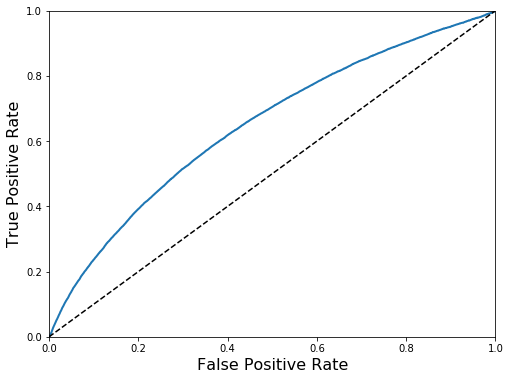

In [91]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

In [92]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train, y_scores)

0.64696994261668195

In [93]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, home_credit_prepared, y_train, cv=3,method="predict_proba")

In [94]:
forest_clf.fit(home_credit_prepared, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [95]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train,y_scores_forest)

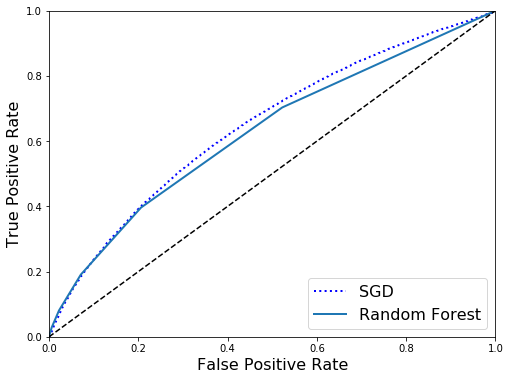

In [96]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [97]:
roc_auc_score(y_train, y_scores_forest)

0.62785940529797113

In [98]:
y_scores_forest.shape

(246008,)

### Submissions

In [56]:
submission_data = os.path.join('.','data','application_test.csv')
submission_df = pd.read_csv(submission_data)

submission_X = submission_df.drop('SK_ID_CURR', axis=1) # drop labels for training set
submission_ids = submission_df['SK_ID_CURR'].copy()

In [ ]:
import random

def set_unknown(colVal, setOfValues):
    if colVal in setOfValues:
        return colVal
    return random.choice(list(setOfValues))
    

In [79]:
# here is how you would use the above function to fill values in the test set
# that are not see in the training set

practice = DataFrame({'col1':['cat','cat','dog','pig'], 'col2':['cat','cat','dog','pig']})
values = set(['cat','dog'])

list(np.vectorize(set_unknown)(practice['col1'], values))

['cat', 'cat', 'dog', 'dog']

In [ ]:
# apply the column cleaning logic to an entire dataframe

def clean_submission_categories(trainDF, submissionDF, categoricalColumns):
    X_submission_new = {}
    for name, values in submissionDF[categoricalColumns].iteritems():
        uniqueColumnValues = set(trainDF[name])
        currentValues = np.vectorize(set_unknown)(submissionDF[name], uniqueColumnValues)
        X_submission_new[name] = currentValues
    return X_submission_new

In [ ]:
submissionCategoricals = clean_submission_categories(X_train, submission_X, categoricalColumns)

submissionCategoricalsDF = pd.DataFrame.from_dict(submissionCategoricals)

In [81]:
# check the training data has the same number of columns as the test data

print(f'Train numerical columns: {applicationDF[numericalColumns].shape[1]} columns')
print(f'Train categorical columns: {applicationDF[categoricalColumns].shape[1]} columns')
print(f'Test numerical columns: {submission_df[numericalColumns].shape[1]} columns')
print(f'Test categorical columns: {submissionCategoricalsDF.shape[1]} columns')

Train numerical columns: 69 columns
Train categorical columns: 50 columns
Test numerical columns: 69 columns
Test categorical columns: 50 columns


In [ ]:
finalSubmissionDF = pd.concat([submission_df[numericalColumns], submissionCategoricalsDF], axis=1)

In [ ]:
submission_prepared = full_pipeline.transform(finalSubmissionDF)

In [100]:
y_probas_forest = forest_clf.predict_proba(submission_prepared)

In [ ]:
sub

In [147]:
finalOutput = DataFrame(np.concatenate([submission_ids.values.reshape(-1,1), y_probas_forest[:,1:]], axis=1))

finalOutput.loc[:,0] = finalOutput.loc[:,0].astype(int)

finalOutput.columns=['SK_ID_CURR','TARGET']

In [148]:
finalOutput.to_csv('submissions/submission.csv', index=False)

In [131]:
# y_sgd_submission = sgd_clf.predict_proba(submission_prepared)

### Questions

1. How to give a neural network categorical data?

### Playground

In [31]:
!ls -ltr data/

total 5242728
-rw-rw-r--  1 johnzupan  staff  166133370 May 17 18:06 application_train.csv
-rw-rw-r--  1 johnzupan  staff     536202 May 17 18:06 sample_submission.csv
-rw-rw-r--  1 johnzupan  staff   26567651 May 17 18:06 application_test.csv
-rw-rw-r--  1 johnzupan  staff  375592889 May 17 22:08 bureau_balance.csv
-rw-rw-r--  1 johnzupan  staff  170016717 May 17 22:08 bureau.csv
-rw-rw-r--  1 johnzupan  staff  424582605 May 17 22:10 credit_card_balance.csv
-rw-rw-r--  1 johnzupan  staff  723118349 May 17 22:13 installments_payments.csv
-rw-rw-r--  1 johnzupan  staff  392703158 May 17 22:14 POS_CASH_balance.csv
-rw-rw-r--  1 johnzupan  staff  404973293 May 17 22:15 previous_application.csv
-rw-r--r--@ 1 johnzupan  staff      37383 Jun  4 21:17 HomeCredit_columns_description.csv


In [ ]:
bureauBalancePath = os.path.join('.','data', 'bureau_balance.csv')

df = pd.read_csv(bureauBalancePath)

df.head()

In [ ]:
df.STATUS.value_counts()

In [ ]:
bureauBalancePath = os.path.join('.','data', 'bureau.csv')

df = pd.read_csv(bureauBalancePath)

df.head()

### Ideas
1. 